In [71]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [73]:
# Read the dataset using read_csv function
df_all = pd.read_csv('../dataset/indian_unicorns_all_time.csv')

In [74]:
# Convert the 'Entry' column values into datatime64[ns] format
df_all['Entry'] = pd.to_datetime(df_all['Entry'])

# Rename required column
df_all.rename(columns={'Entry':'Date_of_Entry'}, inplace=True)

# Sort the companies in descending order of valuation
df_all.sort_values(['Valuation ($B)'], ascending=[0])
df_all.drop(['Unnamed: 0'], axis=1, inplace=True)

df_all.head()

,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Date_of_Entry,Location,Select Investors
0,Leadsquared,SaaS - CRM,1.0,1.0,2022-06-01,Bangalore,"Stakeboat Capital, Gaja Capital, WestBridge"
1,Purplle,E-Commerce - Personal Care & Cosmetics,1.1,1.1,2022-06-01,Mumbai,"JSW Ventures, IvyCap Ventures, Blume Ventures,..."
2,PhysicsWallah,Edtech,1.1,1.1,2022-06-01,Noida,"GSV Ventures, WestBridge"
3,Open Financial Technologies,Fintech - Neo Bank,1.0,1.0,2022-05-01,Karnataka,"3ONE4 Capital, Tiger Global, Temasek, Speedinvest"
4,Games24x7,Gaming,2.5,2.5,2022-03-01,Mumbai,"Tiger Global, Malabar Investments, The Raine ..."


## Categorize companies into three categories
* **Graduated Unicorn:** A startup that has now become Publicly Listed (or) has been acquired by a Publicly Listed company.
* **Former Unicorn:** A startup that lost its Unicorn status due to a valuation degrading event.
* **Unicorn:** A unicorn company is any private company that is valued at $1-Billion or more and is Venture Capital funded.

In [75]:
# Categorize companies into categories
### Categories : (graduated, former, current)
def categorize_company(company_name):
    dict_cat = {
        'graduated' : '^',
        'former' : '*'
    }
    if(dict_cat['graduated'] in company_name):
        return str("Graduated")
    if(dict_cat['former'] in company_name):
        return str("Former")
    else:
        return str("Current")

In [76]:
# Add a new column with the current valuation status of the companies
df_all['current_category'] = df_all['Company'].apply(lambda x : categorize_company(str(x)))

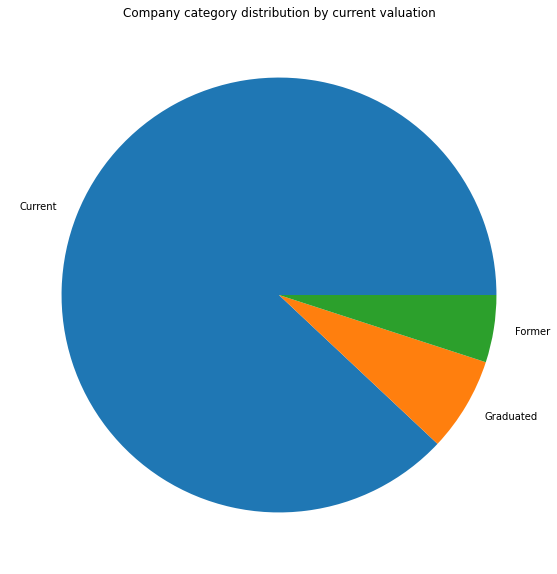

In [90]:
# Plot the number of companies in each category



#Set color palette using seaborn
color_palette = sns.color_palette("deep")

# Draw pie chart using matplotlib (seaborn doesn't have inbuilt function for pie chart)
plt.subplots(figsize=(10,10))
plt.title('Company category distribution by current valuation')
plt.pie(df_all['current_category'].value_counts(), labels=df_all['current_category'].unique())
plt.show()